# Importing packages and library tools which may be used.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Loading Data Sets

In [3]:
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')

In [4]:
#Some EDA is to be done for clearing the data set

In [5]:
df_train.shape

(69713, 22)

In [6]:
df_train.head()

,'ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [7]:
df_test.shape

(30037, 21)

In [8]:
df_test.head()

,'ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1
0,APPA70109647212,Male,03/06/88,05/07/16,C10028,C,COM0002222,A,4.0,2150.0,...,P,Y,S122,B,0.0,10000.0,3.0,20.0,372.0,4
1,APPB10687939341,Male,13/07/81,01/07/16,C10003,A,COM0001784,C,4.0,4200.0,...,P,Y,S133,C,0.0,69000.0,5.0,24.0,1985.0,7
2,APPC80449411414,Female,19/11/90,01/07/16,C10009,B,COM0045260,B,4.0,1000.0,...,P,N,S133,B,0.0,NaN,NaN,NaN,NaN,0
3,APPD30665094501,Female,15/10/92,01/07/16,C10005,A,COM0000085,A,3.0,1465.0,...,P,N,S133,C,0.0,NaN,NaN,NaN,NaN,0
4,APPE80379821637,Male,21/09/88,01/07/16,C10005,A,COM0006422,A,4.0,2340.0,...,P,Y,S143,B,500.0,10000.0,2.0,NaN,NaN,0


In [9]:
df_test.dtypes

'ID                                     object
Gender                                  object
DOB                                     object
Lead_Creation_Date                      object
City_Code                               object
City_Category                           object
Employer_Code                           object
Employer_Category1                      object
Employer_Category2                     float64
Monthly_Income                         float64
Customer_Existing_Primary_Bank_Code     object
Primary_Bank_Type                       object
Contacted                               object
Source                                  object
Source_Category                         object
Existing_EMI                           float64
Loan_Amount                            float64
Loan_Period                            float64
Interest_Rate                          float64
EMI                                    float64
Var1                                     int64
dtype: object

In [10]:
df_combined = pd.concat([df_train, df_test]) 
#adding test and train set for easier eda

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


## Checking for Correaltion

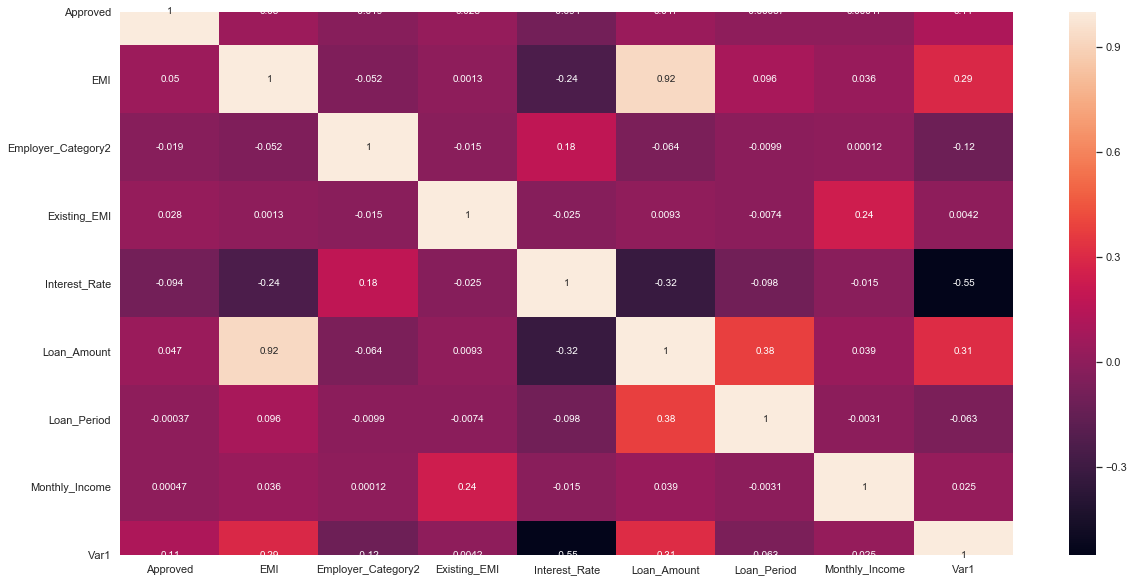

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df_combined.corr(), annot=True)
plt.show()

## Visulaisation
## MATPLOTLIB and SEABORN

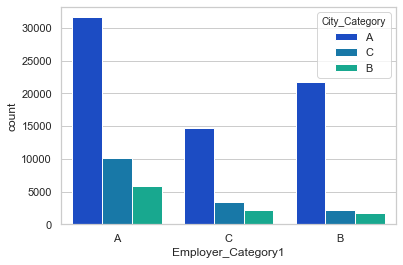

In [13]:
sns.countplot(x=df_combined.Employer_Category1,hue=df_combined.City_Category,palette='winter')

# Checking for missing values in the data set and dropping useless columns

In [13]:
(np.sum(df_combined.isnull())/df_combined.shape[0]).sort_values(ascending=True)*100

'ID                                     0.000000
Source                                  0.000000
Monthly_Income                          0.000000
Lead_Creation_Date                      0.000000
Gender                                  0.000000
Source_Category                         0.000000
Var1                                    0.000000
Contacted                               0.000000
DOB                                     0.018045
Existing_EMI                            0.083208
City_Code                               1.130827
City_Category                           1.130827
Employer_Category1                      5.637093
Employer_Code                           5.637093
Employer_Category2                      6.008020
Customer_Existing_Primary_Bank_Code    13.461654
Primary_Bank_Type                      13.461654
Approved                               30.112281
Loan_Amount                            39.679198
Loan_Period                            39.679198
EMI                 

In [14]:
df_combined.City_Code.nunique() #dropping

704

In [15]:
df_combined.City_Category.unique()# have to do O.H.E

array(['A', 'C', 'B', nan], dtype=object)

In [16]:
df_combined.Employer_Code.nunique() #dropping

48281

In [17]:
df_combined.Customer_Existing_Primary_Bank_Code.nunique()#dropping 

57

In [18]:
df_combined.Primary_Bank_Type.nunique() #convert into 0,1

2

In [19]:
df_combined.Source.nunique() #dropping 

33

In [20]:
df_combined.Source_Category.nunique()# O.H.E

7

In [21]:
df_combined.drop(['Source','Customer_Existing_Primary_Bank_Code','Employer_Code','City_Code','Interest_Rate','EMI'],axis=1,inplace=True)
df_combined.head(1) #dropping some columns on the basis of usefullness

,'ID,Approved,City_Category,Contacted,DOB,Employer_Category1,Employer_Category2,Existing_EMI,Gender,Lead_Creation_Date,Loan_Amount,Loan_Period,Monthly_Income,Primary_Bank_Type,Source_Category,Var1
0,APPC90493171225,0.0,A,N,23/07/79,A,4.0,0.0,Female,15/07/16,NaN,NaN,2000.0,P,G,0


In [22]:
df_combined.isnull().sum()

'ID                       0
Approved              30037
City_Category          1128
Contacted                 0
DOB                      18
Employer_Category1     5623
Employer_Category2     5993
Existing_EMI             83
Gender                    0
Lead_Creation_Date        0
Loan_Amount           39580
Loan_Period           39580
Monthly_Income            0
Primary_Bank_Type     13428
Source_Category           0
Var1                      0
dtype: int64

#### Filling Null values 

In [23]:
df_combined.Loan_Amount.mean()

39445.98637194615

In [24]:
df_combined['Loan_Amount'].fillna(value= 39446 ,inplace= True)
df_combined['Loan_Amount'].nunique()

207

In [25]:
df_combined.Loan_Period.mean()

3.8943992022602627

In [26]:
df_combined['Loan_Period'].fillna(value= 3.894399 ,inplace= True)
df_combined['Loan_Period'].nunique()

7

In [27]:
df_combined['City_Category'].fillna(method='bfill' ,inplace= True)
df_combined['Loan_Period'].nunique()

7

In [28]:
df_combined['Contacted'].fillna(method='bfill' ,inplace= True)
df_combined['Contacted'].nunique()

2

In [29]:
df_combined['DOB'].fillna(method='bfill' ,inplace= True)
df_combined['DOB'].nunique()

11672

In [30]:
df_combined['Employer_Category1'].fillna(method='bfill' ,inplace= True)
df_combined['Employer_Category1'].nunique()

3

In [31]:
df_combined['Employer_Category2'].fillna(method='bfill' ,inplace= True)
df_combined['Employer_Category2'].nunique()

4

In [32]:
df_combined['Existing_EMI'].fillna(method='bfill' ,inplace= True)
df_combined['Existing_EMI'].nunique()

4093

In [33]:
df_combined['Primary_Bank_Type'].fillna(method='bfill' ,inplace= True)
df_combined['Primary_Bank_Type'].unique()

array(['P', 'G'], dtype=object)

### Data Mapping

In [34]:
df_combined['Contacted'] = df_combined.Contacted.map({'N':0,'Y':1})# changing values into 0,1

In [35]:
df_combined.Contacted.head()

0    0
1    1
2    1
3    1
4    1
Name: Contacted, dtype: int64

In [36]:
df_combined['Gender'] = df_combined.Gender.map({'Male':0,'Female':1})

In [37]:
df_combined.Gender.head()

0    1
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

In [38]:
df_combined['Primary_Bank_Type'] = df_combined.Primary_Bank_Type.map({'P':0,'G':1})
df_combined.Primary_Bank_Type.head()

0    0
1    0
2    1
3    1
4    0
Name: Primary_Bank_Type, dtype: int64

In [39]:
df_combined.Primary_Bank_Type.nunique()

2

In [40]:
df_combined.Primary_Bank_Type.astype('int64')

0        0
1        0
2        1
3        1
4        0
        ..
30032    1
30033    1
30034    0
30035    1
30036    0
Name: Primary_Bank_Type, Length: 99750, dtype: int64

In [41]:
df_combined.isnull().sum()

'ID                       0
Approved              30037
City_Category             0
Contacted                 0
DOB                       0
Employer_Category1        0
Employer_Category2        0
Existing_EMI              0
Gender                    0
Lead_Creation_Date        0
Loan_Amount               0
Loan_Period               0
Monthly_Income            0
Primary_Bank_Type         0
Source_Category           0
Var1                      0
dtype: int64

In [42]:
df_combined['DOB']= pd.to_datetime(df_combined['DOB']) 
# converting DOB into datetime type

In [43]:
# create age 
df_combined['age'] = 2020 - df_combined.DOB.dt.year
df_combined['age']=np.where(df_combined['age'] <0, '0', df_combined['age'])
df_combined.head()

,'ID,Approved,City_Category,Contacted,DOB,Employer_Category1,Employer_Category2,Existing_EMI,Gender,Lead_Creation_Date,Loan_Amount,Loan_Period,Monthly_Income,Primary_Bank_Type,Source_Category,Var1,age
0,APPC90493171225,0.0,A,0,1979-07-23,A,4.0,0.0,1,15/07/16,39446.0,3.894399,2000.0,0,G,0,41
1,APPD40611263344,0.0,A,1,1986-07-12,C,1.0,0.0,0,04/07/16,20000.0,2.000000,3500.0,0,G,10,34
2,APPE70289249423,0.0,C,1,1982-10-12,C,4.0,0.0,0,19/07/16,45000.0,4.000000,2250.0,1,B,0,38
3,APPF80273865537,0.0,C,1,1989-01-30,A,4.0,0.0,0,09/07/16,92000.0,5.000000,3500.0,1,B,7,31
4,APPG60994436641,0.0,A,1,1985-04-19,A,4.0,2500.0,0,20/07/16,50000.0,2.000000,10000.0,0,B,10,35


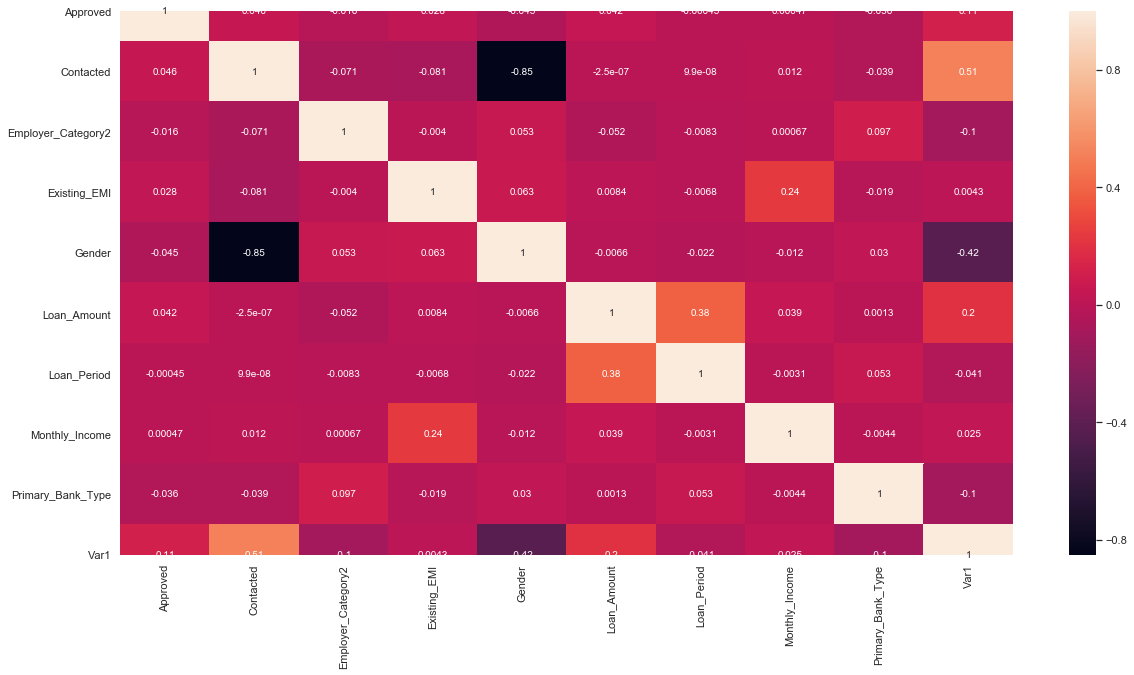

In [44]:
corr1=plt.figure(figsize=(20,10))
sns.heatmap(df_combined.corr(), annot=True)
plt.show()

In [45]:
df_combined.dtypes

'ID                           object
Approved                     float64
City_Category                 object
Contacted                      int64
DOB                   datetime64[ns]
Employer_Category1            object
Employer_Category2           float64
Existing_EMI                 float64
Gender                         int64
Lead_Creation_Date            object
Loan_Amount                  float64
Loan_Period                  float64
Monthly_Income               float64
Primary_Bank_Type              int64
Source_Category               object
Var1                           int64
age                           object
dtype: object

In [46]:
df_combined.drop(['DOB'],axis=1,inplace=True)
df_combined.head(1)

,'ID,Approved,City_Category,Contacted,Employer_Category1,Employer_Category2,Existing_EMI,Gender,Lead_Creation_Date,Loan_Amount,Loan_Period,Monthly_Income,Primary_Bank_Type,Source_Category,Var1,age
0,APPC90493171225,0.0,A,0,A,4.0,0.0,1,15/07/16,39446.0,3.894399,2000.0,0,G,0,41


In [47]:
df_drop_dep=df_combined.drop(['Approved'], axis=1)
df_drop_dep.fillna(df_drop_dep.mean(), inplace=True) #Filling NAN values

In [48]:
dep=['Approved']
col_num= ['Contacted','Monthly_Income','Existing_EMI','Loan_Amount','Loan_Period','Var1','age']
col_char=['Gender','Source_Category','Contacted','Primary_Bank_Type','Employer_Category1','Employer_Category2','City_Category']

In [49]:
X_char_dum = pd.get_dummies(df_drop_dep[col_char], drop_first = False)

X_all=pd.concat([df_drop_dep[col_num],X_char_dum],axis=1, join='inner')

In [50]:
X_char_dum.head()

,Gender,Contacted,Primary_Bank_Type,Employer_Category2,Source_Category_A,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Employer_Category1_A,Employer_Category1_B,Employer_Category1_C,City_Category_A,City_Category_B,City_Category_C
0,1,0,0,4.0,0,0,0,0,0,0,1,1,0,0,1,0,0
1,0,1,0,1.0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,1,1,4.0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0,1,1,4.0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,0,1,0,4.0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [51]:
X_all.shape

(99750, 24)

### Now dividing thetrain and test data set 

In [52]:
Xm=X_all.head(69713)
Xp=X_all.tail(30037)
ym=df_train['Approved'] #Defining target variable

In [53]:
Xm.to_csv('Xm.csv')

### USING ALGORITHMS FOR PREDICTIONS

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

### Logistic Regression

In [55]:
X_train, X_test, y_train, y_test = train_test_split(Xm, ym, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Decision Tree Classifier

In [56]:
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

#### TRAIN ACCURACY

In [57]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [58]:
y_pred_tree=dtree.predict(X_test)
print('Accuracy of Decision tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Accuracy of Decision tree classifier on test set: 0.99


In [59]:
# Importing confusion matrix for getting the exact number of times positive and and negatives are wrongly classified
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[20630     5]
 [  278     1]]


In [60]:
#Importing classification Report for finding what is the accuracy,precision,recall of the model based on classification tree
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     20635
           1       0.00      0.00      0.00       279

    accuracy                           0.99     20914
   macro avg       0.49      0.50      0.50     20914
weighted avg       0.97      0.99      0.98     20914



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Importing ruc_auc_score and roc_curve from sklearn

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
tree_roc_auc=roc_auc_score(y_test, dtree.predict(X_test))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Tree Regression (area = %0.2f)' % tree_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### As seen from the auc of both logistic regression and Decision tree curves are overlapping hence they are same

### PREDICTIONS FOR UNSEEN DATA

In [63]:
y_prediction = logreg.predict(Xp)

In [64]:
y_prediction.shape

(30037,)

In [65]:
y_prediction_tree=dtree.predict(Xp)

In [66]:
y_prediction_tree.shape

(30037,)

### IMPORTING PREDICTED COLUMN INTO THE TEST DATASET

In [67]:
df_test['Approved']=y_prediction
df_test.head()

,'ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPA70109647212,Male,03/06/88,05/07/16,C10028,C,COM0002222,A,4.0,2150.0,...,Y,S122,B,0.0,10000.0,3.0,20.0,372.0,4,0
1,APPB10687939341,Male,13/07/81,01/07/16,C10003,A,COM0001784,C,4.0,4200.0,...,Y,S133,C,0.0,69000.0,5.0,24.0,1985.0,7,0
2,APPC80449411414,Female,19/11/90,01/07/16,C10009,B,COM0045260,B,4.0,1000.0,...,N,S133,B,0.0,NaN,NaN,NaN,NaN,0,0
3,APPD30665094501,Female,15/10/92,01/07/16,C10005,A,COM0000085,A,3.0,1465.0,...,N,S133,C,0.0,NaN,NaN,NaN,NaN,0,0
4,APPE80379821637,Male,21/09/88,01/07/16,C10005,A,COM0006422,A,4.0,2340.0,...,Y,S143,B,500.0,10000.0,2.0,NaN,NaN,0,0
